# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('previsao_de_renda.csv')
print(df.head())

   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36 

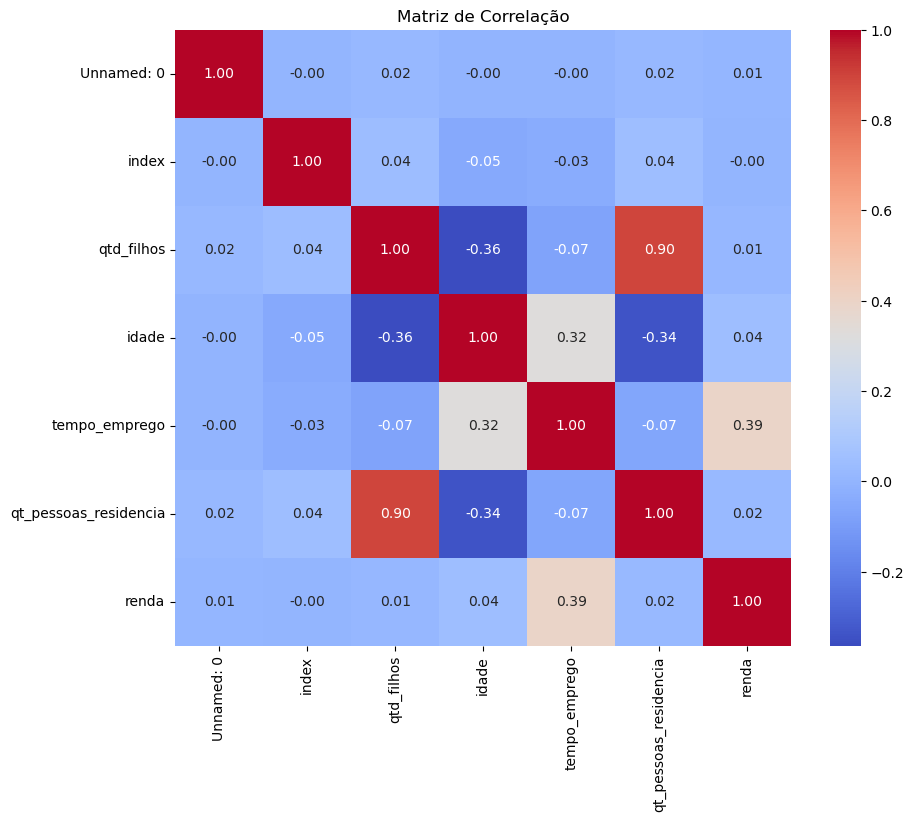

In [3]:
# Selecionando apenas as colunas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação
correlation_matrix = numeric_df.corr()

# Criando o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlação')
plt.show()


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

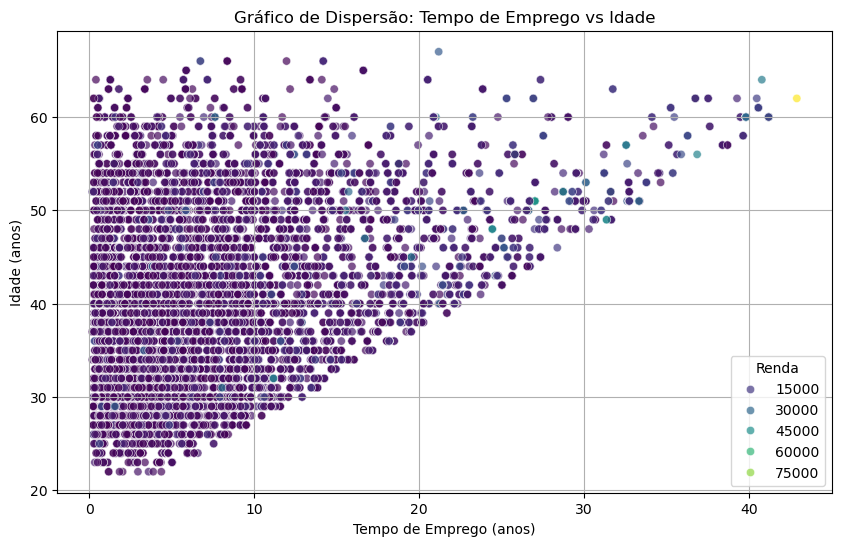

In [13]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tempo_emprego', y='idade', hue='renda', palette='viridis', alpha=0.7)

plt.title('Gráfico de Dispersão: Tempo de Emprego vs Idade')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Idade (anos)')
plt.legend(title='Renda')
plt.grid(True)
plt.show()


3) Na su aopinião, há outliers na variável renda?

In [ ]:
Não, pois não tem um valor muito diferentes dos demais.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [7]:
import numpy as np

# Calculando o logaritmo da variável renda
df['log_renda'] = np.log(df['renda'])
print(df[['renda', 'log_renda']].head())


     renda  log_renda
0  3369.24   8.122442
1  6096.14   8.715411
2  5658.98   8.640999
3  7246.69   8.888300
4  4017.37   8.298383


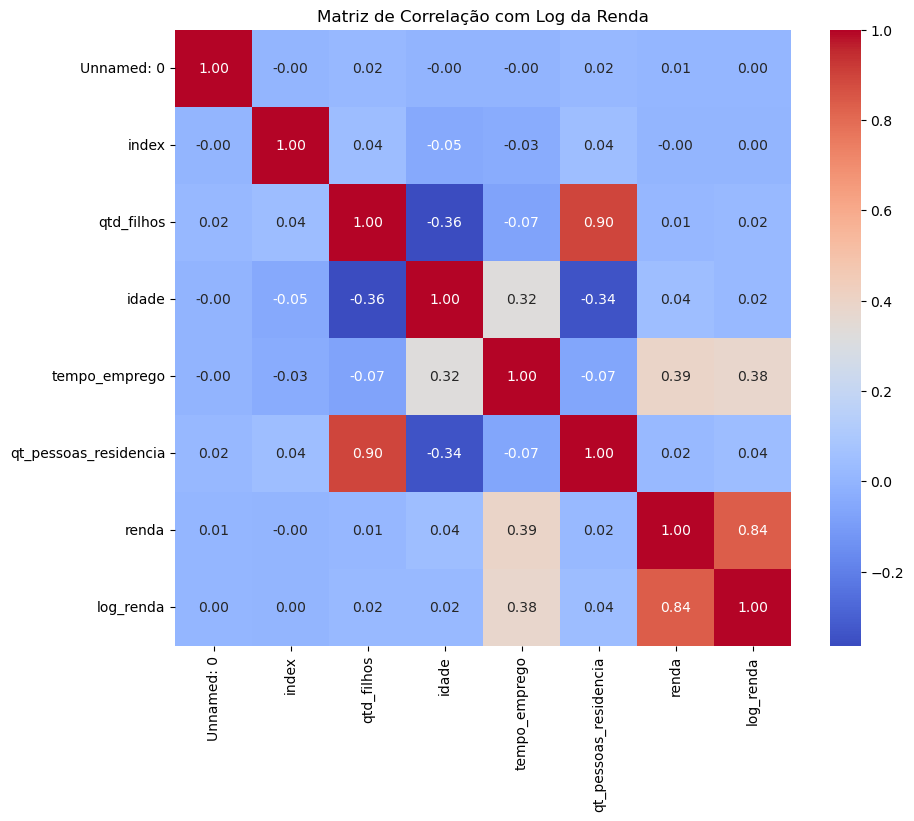

In [15]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Nova matriz de correlação
correlation_matrix = numeric_df.corr()

# Criando o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlação com Log da Renda')
plt.show()


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
Acho que nem piorou nem melhorou ela inverteu os valores da idade e quantidade de pessoas na residencia 